In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

Для лабораторной работы по визуализации взят набор данных "Glioma Grading Clinical and Mutation Features".

Набор был создан с целью анализа глиомы. Глиомы являются наиболее распространенными первичными опухолями головного мозга. Они могут быть классифицированы как LGG (глиома низкой степени злокачественности) или GBM (глиобластома мультиформная) в зависимости от гистологических/визуализационных критериев. Клинические и молекулярные/мутационные факторы также очень важны для процесса классификации. Молекулярные тесты являются дорогостоящими для точной диагностики пациентов с глиомой. В этом наборе данных рассматриваются наиболее часто мутирующие 20 генов и 3 клинических признака из проектов глиомы мозга TCGA-LGG и TCGA-GBM. Задача прогнозирования заключается в том, чтобы определить, является ли пациент LGG или GBM с заданными клиническими и молекулярными/мутационными признаками. Основная цель заключается в том, чтобы найти оптимальный подмножество генов мутаций и клинических признаков для процесса классификации глиомы, чтобы улучшить производительность и сократить расходы.

In [3]:
url = 'https://raw.githubusercontent.com/KoJl9lH-59rus/TMO_LAB_LYGAEV/refs/heads/main/%D0%9A%D0%A21/content/TCGA_InfoWithGrade.csv'

df = pd.read_csv(url)

df['Age_at_diagnosis'] = df['Age_at_diagnosis'].round(0)

df.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,39.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,33.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,32.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0



1. **Grade:** Степень злокачественности глиомы
2. **Gender:** Пол (0 = "мужской"; 1 = "женский")
3. **Age_at_diagnosis:** Возраст на момент постановки диагноза
4. **Race:** Раса (0 = «белый»; 1 = «черный или афроамериканец»; 2 = «азиат»; 3 = «американский индеец или коренной житель Аляски»)

Далее идут вещества взятые на анализ у больных (20 генов), где 0 = нет мутации; 1 = есть мутации
5. Изоцитратдегидрогеназа 1
6. Опухолевый белок p53
7. Ремоделер хроматина
8. Гомолог фосфатазы и тензина
9. Рецептор эпидермального фактора роста
10. Транскрипционный репрессор capicua
11. Муцин 16, связанный с клеточной поверхностью
12. Фосфатидилинозитол-4,5-бисфосфат 3-киназы каталитическая субъединица альфа
13. Нейрофибромин 1
14. Регуляторная субъединица 1 фосфоинозитид-3-киназы
15. Белок связывания дальнего элемента выше по течению 1
16. Транскрипционный корепрессор RB 1
17. Рецептор notch 1
18. Корепрессор BCL6
19. CUB и Sushi множественные домены 3
20. SWI/SNF-связанный, связанный с матриксом, зависимый от актина регулятор хроматина, подсемейство a, член 4
21. Субъединица 2A ионотропного рецептора глутамата типа NMDA
22. Изоцитратдегидрогеназа 2
23. FAT атипичный кадгерин
24. Рецептор тромбоцитарного фактора роста альфа
---


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

Разделяем датасет на целевую переменную, и остальной датасет

In [4]:
X = df.drop(['Grade'], axis=1)
y = df["Grade"]
vals= ['0 (нет заболевания)', '1 (есть заболевание)']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

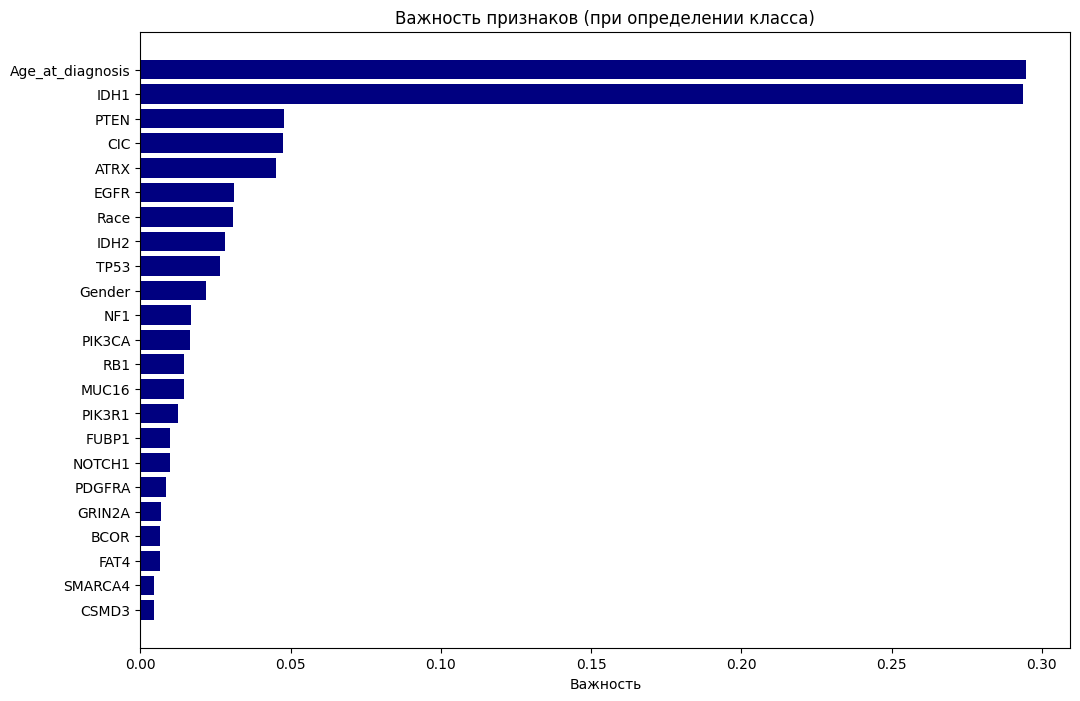

In [ ]:
# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Получаем важность признаков
importance = model.feature_importances_

# Создаем DataFrame для удобства
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='navy')
plt.xlabel('Важность')
plt.title('Важность признаков (при определении класса)')
plt.gca().invert_yaxis()  # Инвертируем ось y
plt.show()

Самыми важными признаками являются возраст диагностирования рака и анализ гена IDH1

#Метод главных компонент (Principal Component Analysis, PCA)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

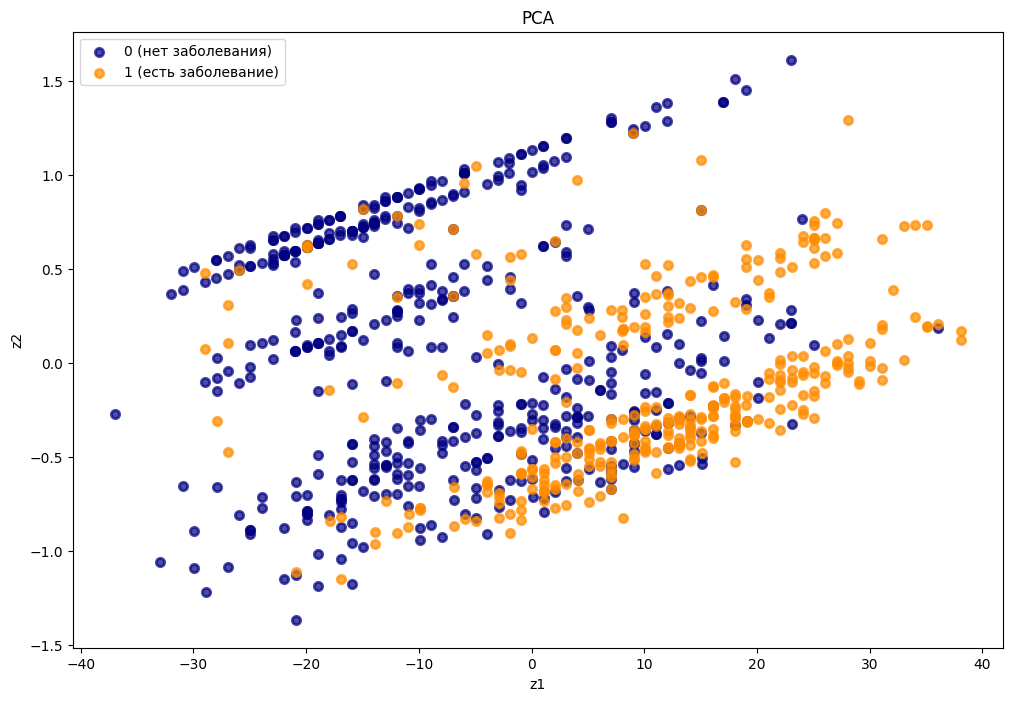

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]

for i, target_name in enumerate(y.unique()):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], alpha=0.7, lw=2, label=vals[i])

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA")
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.99221259, 0.00132746])

#Независисый анализ компонентов (Independent Component Analysis, ICA)

In [ ]:
from sklearn.decomposition import FastICA

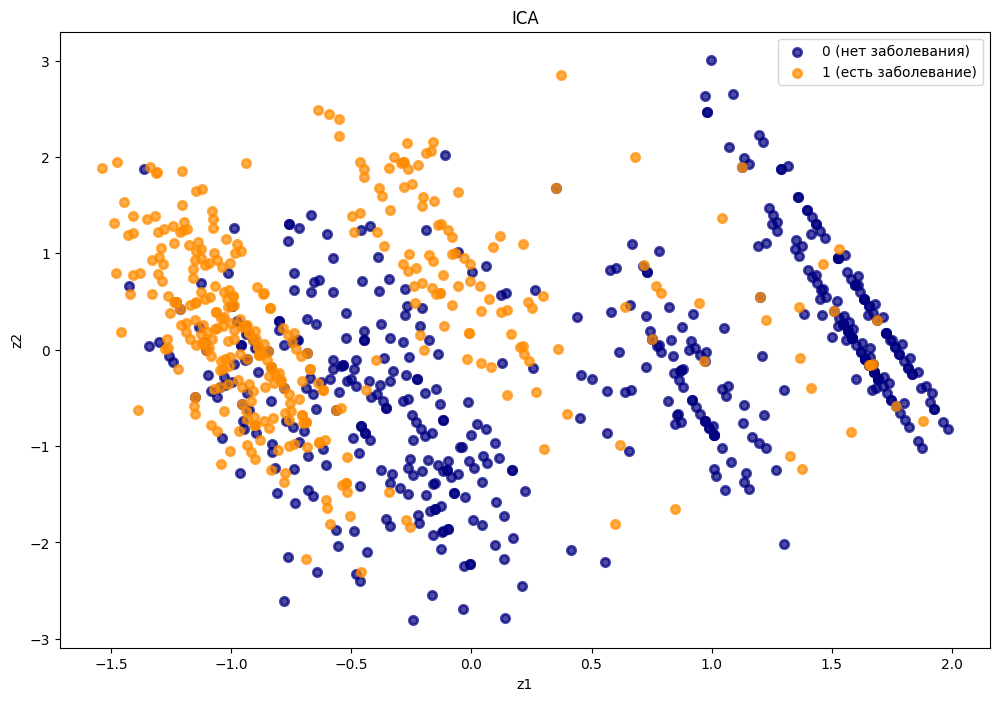

In [ ]:
fast_ica = FastICA(n_components=2)
X_ica = fast_ica.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]

for i, target_name in enumerate(y.unique()):
    plt.scatter(
        X_ica[y == i, 0], X_ica[y == i, 1], color=colors[i], alpha=0.7, lw=2, label=vals[i])

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("ICA")
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

#Kernel PCA

In [63]:
from sklearn.decomposition import KernelPCA

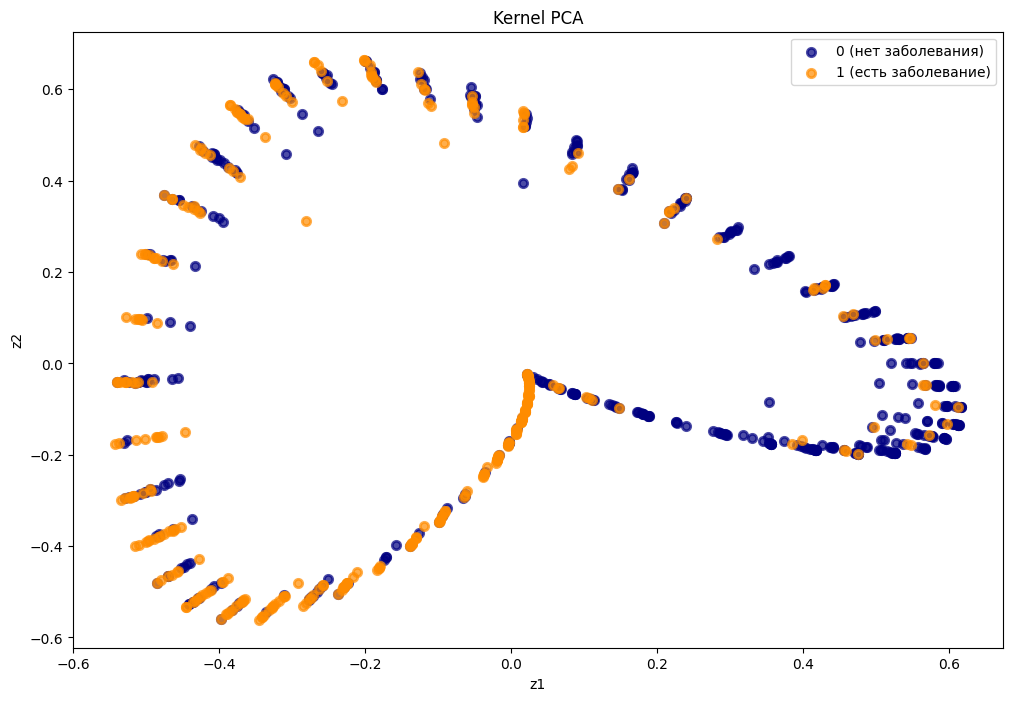

In [65]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_rbf = rbf_pca.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]

for i, target_name in enumerate(y.unique()):
    plt.scatter(
        X_rbf[y == i, 0], X_rbf[y == i, 1], color=colors[i], alpha=0.7, lw=2, label=vals[i])

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Kernel PCA")
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

#tSNE

In [57]:
from sklearn.manifold import TSNE

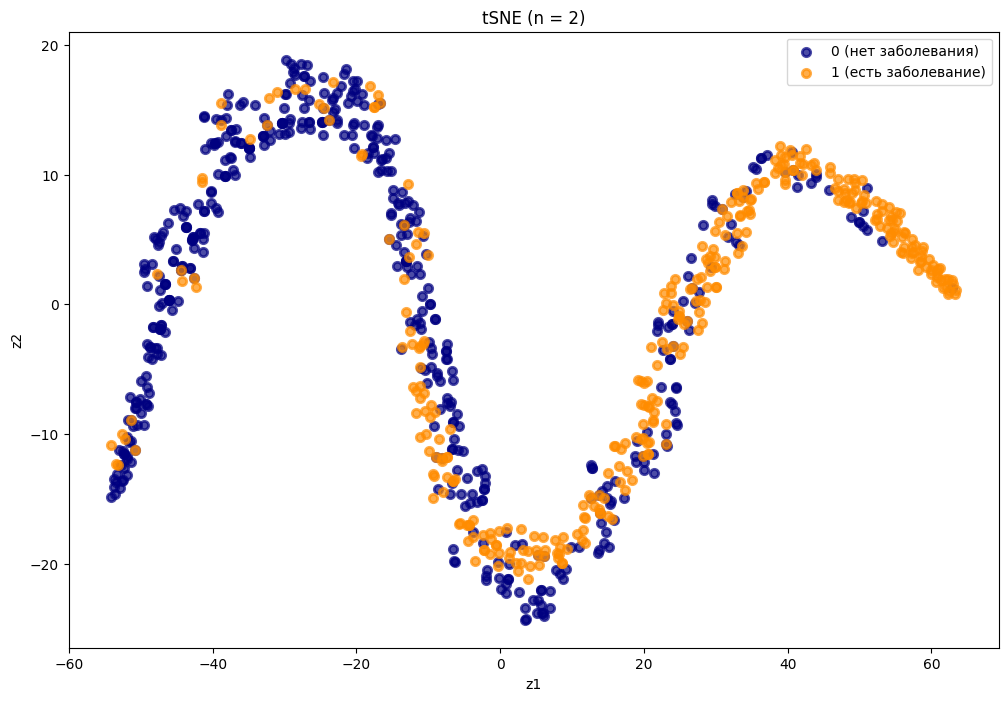

In [60]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "darkorange"]

for i, target_name in enumerate(y.unique()):
    plt.scatter(
        X_tsne[y == i, 0], X_tsne[y == i, 1], color=colors[i], alpha=0.7, lw=2, label=vals[i])

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("tSNE (n = 2)")
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:

# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_tsne.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (839, 23)
New Shape of X:  (839, 2)
Kullback-Leibler divergence after optimization:  0.3795227110385895
No. of iterations:  999


Низкий показатель KL-диверегенции говорит о том, что tSNE успешно сохранил структуру данных при уменьшении размерности, KL = 0.38 можно считать удовлетворительным.

#DBSCAN

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [75]:
min_samples = len(y.unique()) + 1
dbscan_cluster1 = DBSCAN(eps = 1.1, min_samples = 2)
X_new = dbscan_cluster1.fit(X)

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 54
Estimated no. of noise points: 334
v_measure = 0.12559904302944064


Единственная конфигурация при которой можно получить самую большую согласованность

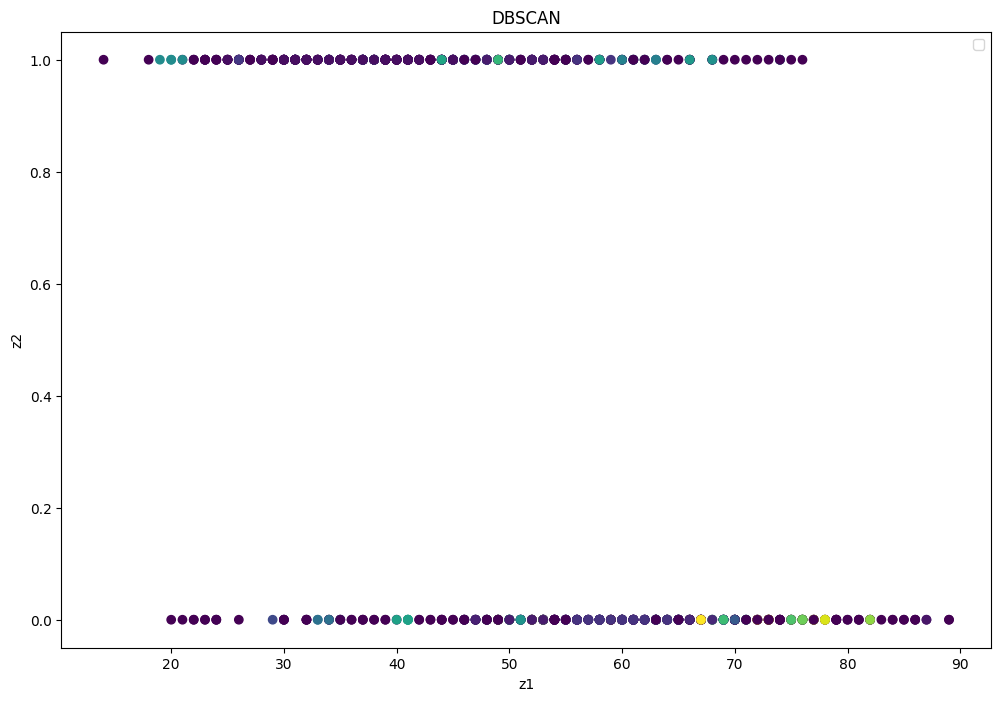

In [73]:
plt.figure(figsize=(12,8))
colors = ["orange", "blue"]

plt.scatter(X["Age_at_diagnosis"], X["IDH1"],c=dbscan_cluster1.labels_)

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.title('DBSCAN')
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Определим eps с помощью правила локтя.

In [36]:
from sklearn.neighbors import NearestNeighbors
import sklearn

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

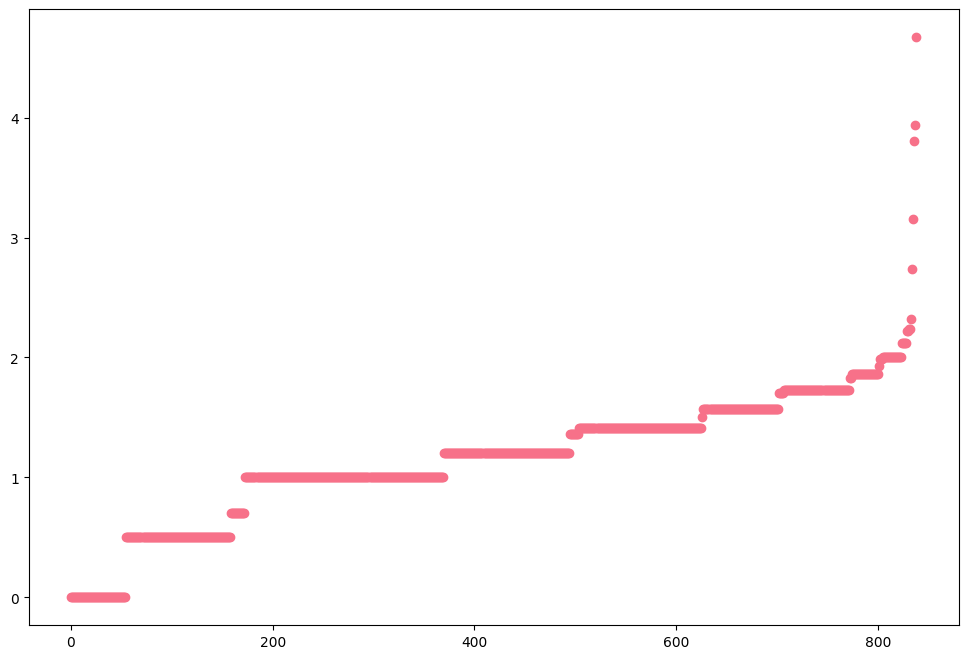

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

#DBSCAN для определения выбросов

In [80]:
dbscan = DBSCAN(eps = 2, min_samples = 2)
pred = dbscan.fit_predict(X)

# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 4
Estimated no. of noise points: 7
v_measure = 0.024767126298874672


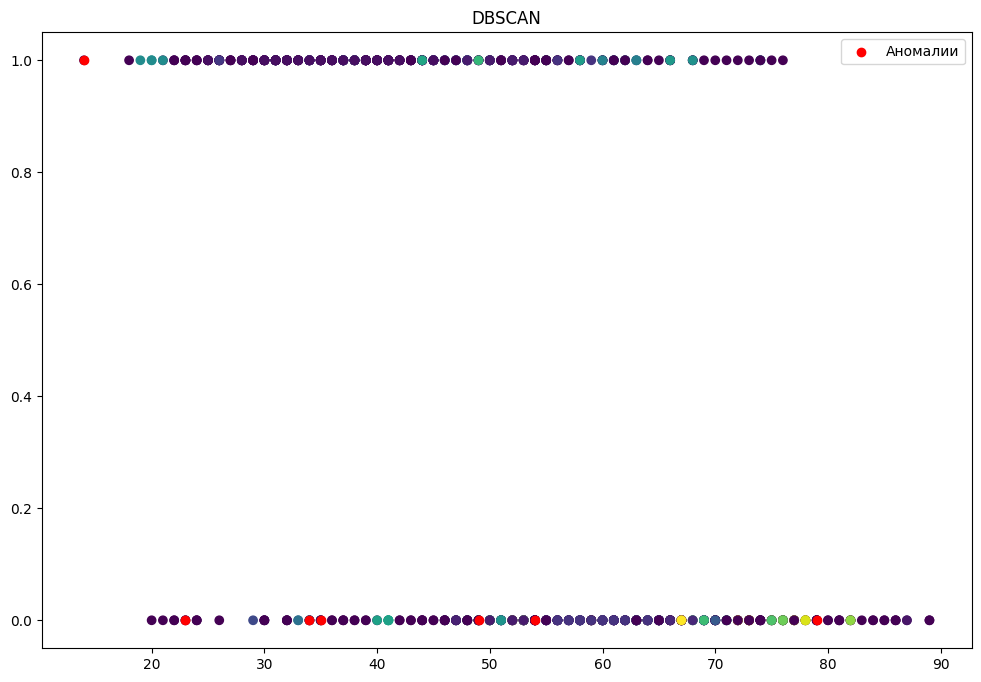

In [83]:
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

plt.figure(figsize=(12,8))
plt.title('DBSCAN')
plt.scatter(X["Age_at_diagnosis"], X["IDH1"], c=dbscan_cluster1.labels_)
plt.scatter(values["Age_at_diagnosis"], values["IDH1"], color='r', label='Аномалии')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()